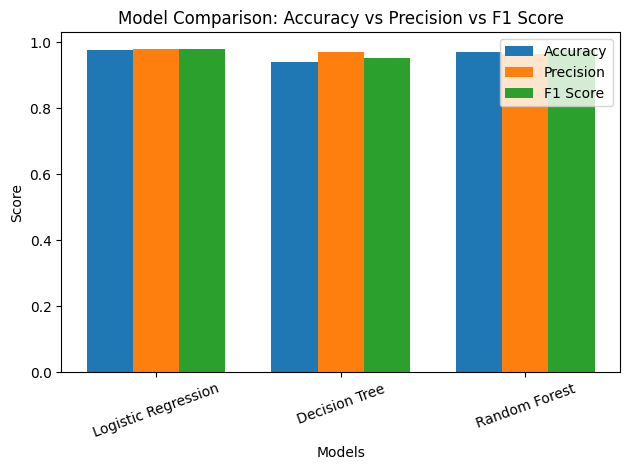

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

# Create models
models = {
    "Logistic Regression": LogisticRegression(max_iter=5000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

accuracy_list = []
precision_list = []
f1_list = []
model_names = []

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    model_names.append(name)
    accuracy_list.append(acc)
    precision_list.append(prec)
    f1_list.append(f1)

# Plot in single graph
x = np.arange(len(model_names))
width = 0.25

plt.figure()
plt.bar(x - width, accuracy_list, width, label='Accuracy')
plt.bar(x, precision_list, width, label='Precision')
plt.bar(x + width, f1_list, width, label='F1 Score')

plt.xlabel("Models")
plt.ylabel("Score")
plt.title("Model Comparison: Accuracy vs Precision vs F1 Score")
plt.xticks(x, model_names, rotation=20)
plt.legend()
plt.tight_layout()
plt.show()